In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import muon as mu

sc.logging.print_header()

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.5 scipy==1.7.1 pandas==1.2.4 scikit-learn==1.0.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


In [2]:
mu.__version__

'0.1.2'

In [3]:
adata = sc.read_h5ad('raw/GSE161918_RNA_prepped.h5ad')
cite1 = sc.read_h5ad('raw/GSE161918_CITE_prepped_clr_bgsubtracted.h5ad')
cite2 = sc.read_h5ad('raw/GSE161918_CITE_prepped_clr_raw.h5ad')

In [4]:
adata = adata.raw.to_adata()
adata.raw = adata
adata

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


AnnData object with n_obs × n_vars = 411902 × 32738
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of

In [5]:
# subset to highly variable
adata = adata[:, adata.var.highly_variable].copy()
adata

AnnData object with n_obs × n_vars = 411902 × 1961
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_

In [6]:
cite1 = cite1.raw.to_adata()
cite1.var_names = ['AB_' + x for x in cite1.var_names]
cite1.var['highly_variable'] = True
cite1.raw = cite1
cite1

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [7]:
cite2 = cite2.raw.to_adata()
cite2.var_names = ['AB_' + x for x in cite2.var_names]
cite2.var['highly_variable'] = True
cite2.raw = cite2
cite2

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [9]:
# remove all unnecessary columns from obs and var
adata.obs = adata.obs[['sample_id', 'mergedcelltype', 'adjustedcelltype', 'WCTmergedcelltype', 'WCTcoursecelltype', 'leiden']]
cite1.obs = cite1.obs[['sample_id', 'mergedcelltype', 'adjustedcelltype', 'WCTmergedcelltype', 'WCTcoursecelltype', 'leiden']]
cite2.obs = cite2.obs[['sample_id', 'mergedcelltype', 'adjustedcelltype', 'WCTmergedcelltype', 'WCTcoursecelltype', 'leiden']]

In [13]:
adata.var = adata.var[[]]
cite1.var = cite1.var[[]]
cite2.var = cite2.var[[]]

In [18]:
mdata1 = mu.MuData({'rna': adata, 'cite': cite1})
mdata2 = mu.MuData({'rna': adata, 'cite': cite2})

In [19]:
mu.tl.mofa(mdata1, gpu_mode = True)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=411902 samples and D=1961 features...
Loaded view='cite' group='group1' with N=411902 samples and D=180 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights

In [20]:
# erm, retrieve the model and place it somewhere else
import shutil

shutil.move('/tmp/mofa_20220907-152214.hdf5', 'mofa_20220907-152214.hdf5')

'mofa_20220907-152214.hdf5'

In [21]:
mu.tl.mofa(mdata2, gpu_mode = True)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=411902 samples and D=1961 features...
Loaded view='cite' group='group1' with N=411902 samples and D=180 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights

In [22]:
shutil.move('/tmp/mofa_20220907-154443.hdf5', 'mofa_20220907-154443.hdf5')

'mofa_20220907-154443.hdf5'

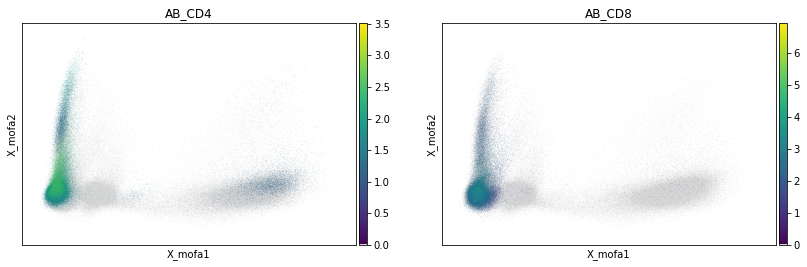

In [23]:
import tools
mu.pl.mofa(mdata1, color = ['AB_CD4', 'AB_CD8'], color_map = tools.cmp())

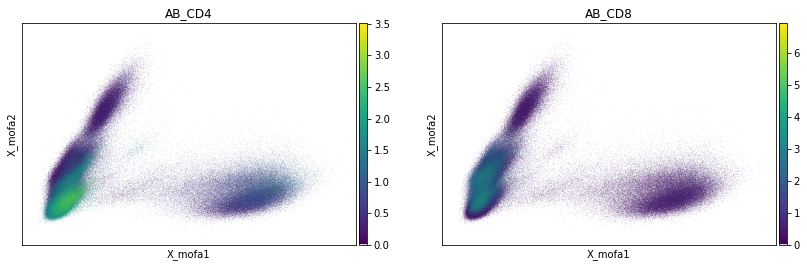

In [24]:
mu.pl.mofa(mdata2, color = ['AB_CD4', 'AB_CD8'], color_map = tools.cmp())

In [25]:
sc.pp.neighbors(mdata1, use_rep="X_mofa")
sc.tl.umap(mdata1, min_dist = .3)

In [26]:
sc.pp.neighbors(mdata2, use_rep="X_mofa")
sc.tl.umap(mdata2, min_dist = .3)

In [27]:
mdata1.update()
mdata2.update()

In [28]:
mdata1

MuData object with n_obs × n_vars = 411902 × 2141
  obsm:	'X_mofa', 'X_umap'
  varm:	'LFs'
  obsp:	'distances', 'connectivities'
  2 modalities
    rna:	411902 x 1961
      obs:	'sample_id', 'mergedcelltype', 'adjustedcelltype', 'WCTmergedcelltype', 'WCTcoursecelltype', 'leiden'
      uns:	'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      obsp:	'connectivities', 'distances'
    cite:	411902 x 180
      obs:	'sample_id', 'mergedcelltype', 'adjustedcelltype', 'WCTmergedcelltype', 'WCTcoursecelltype', 'leiden'
      uns:	'hvg', 'leiden', 'leiden_colors', 'mergedcelltype_colors', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      obsp:	'connectivities', 'distances'

In [29]:
mdata2

MuData object with n_obs × n_vars = 411902 × 2141
  obsm:	'X_mofa', 'X_umap'
  varm:	'LFs'
  obsp:	'distances', 'connectivities'
  2 modalities
    rna:	411902 x 1961
      obs:	'sample_id', 'mergedcelltype', 'adjustedcelltype', 'WCTmergedcelltype', 'WCTcoursecelltype', 'leiden'
      uns:	'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      obsp:	'connectivities', 'distances'
    cite:	411902 x 180
      obs:	'sample_id', 'mergedcelltype', 'adjustedcelltype', 'WCTmergedcelltype', 'WCTcoursecelltype', 'leiden'
      uns:	'hvg', 'leiden', 'leiden_colors', 'mergedcelltype_colors', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      obsp:	'connectivities', 'distances'

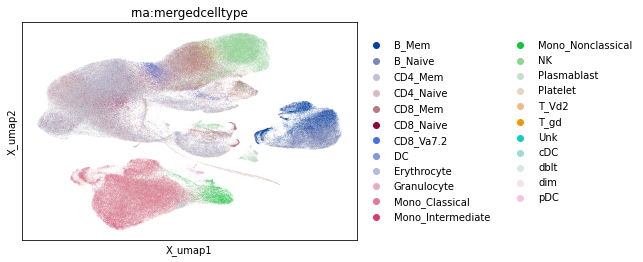

In [30]:
mu.pl.umap(mdata1, color=['rna:mergedcelltype'])

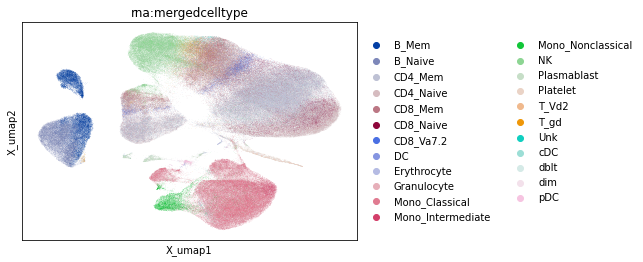

In [31]:
mu.pl.umap(mdata2, color=['rna:mergedcelltype'])

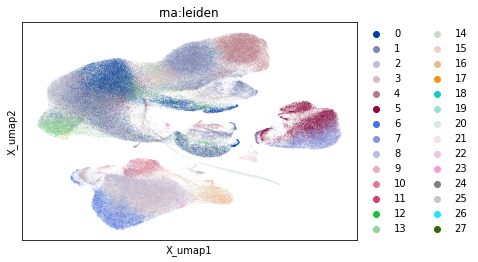

In [32]:
mu.pl.umap(mdata1, color=['rna:leiden'])

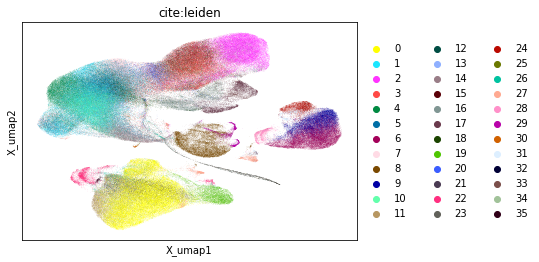

In [33]:
mu.pl.umap(mdata1, color=['cite:leiden'])

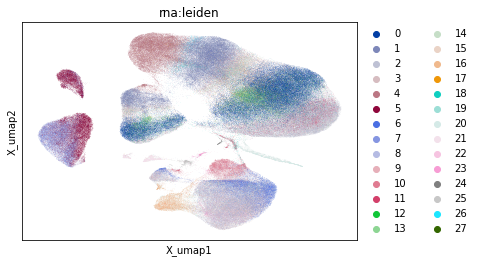

In [34]:
mu.pl.umap(mdata2, color=['rna:leiden'])

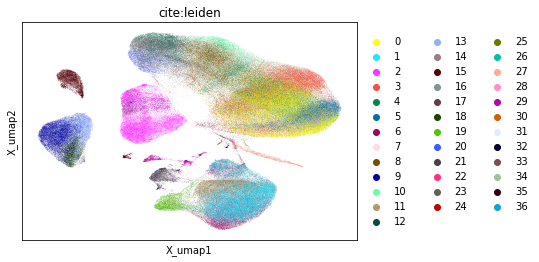

In [35]:
mu.pl.umap(mdata2, color=['cite:leiden'])

In [36]:
mdata1.obs['cite_normal:leiden'] = mdata2.obs['cite:leiden']
mdata2.obs['cite_bgcorrected:leiden'] = mdata1.obs['cite:leiden']
mdata1.obs['cite_bgcorrected:leiden'] = mdata1.obs['cite:leiden']
mdata2.obs['cite_normal:leiden'] = mdata2.obs['cite:leiden']

In [37]:
mdata1.write("raw/GSE161918_RNA_cite_bg_corrected_mofa.h5mu", compression = 'gzip')

In [38]:
mdata2.write("raw/GSE161918_RNA_cite_mofa.h5mu", compression = 'gzip')

In [1]:
import muon as mu
mdata1 = mu.read("raw/GSE161918_RNA_cite_bg_corrected_mofa.h5mu")
mdata2 = mu.read("raw/GSE161918_RNA_cite_mofa.h5mu")

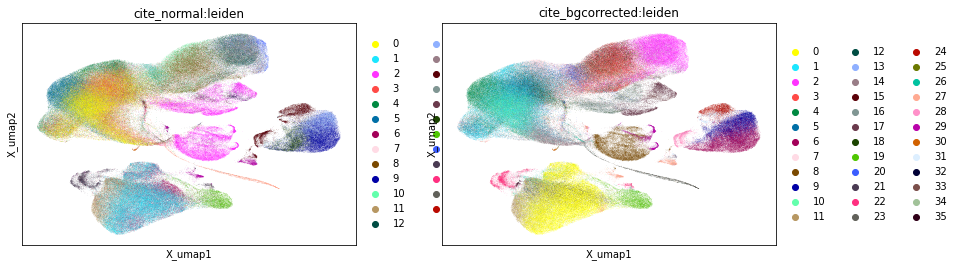

In [39]:
mu.pl.umap(mdata1, color=['cite_normal:leiden', 'cite_bgcorrected:leiden'])

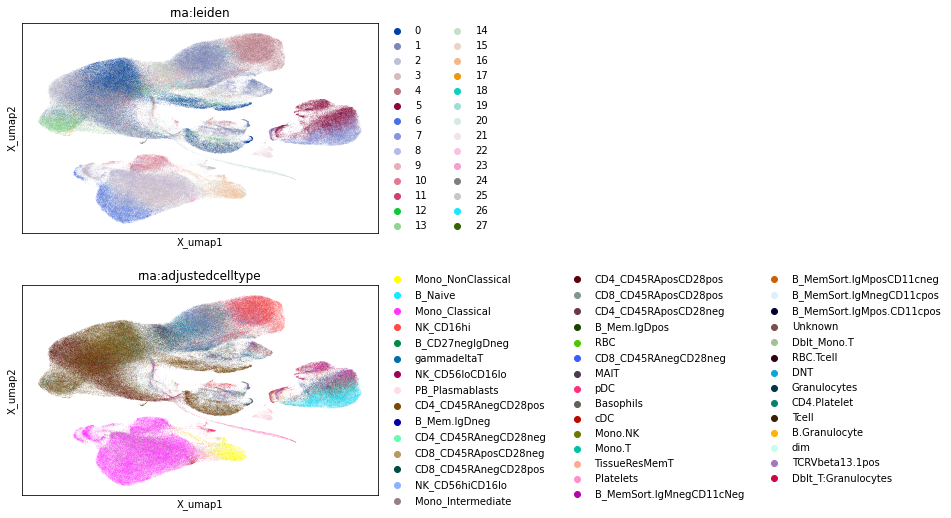

In [2]:
mu.pl.umap(mdata1, color=['rna:leiden', 'rna:adjustedcelltype'], ncols =1)

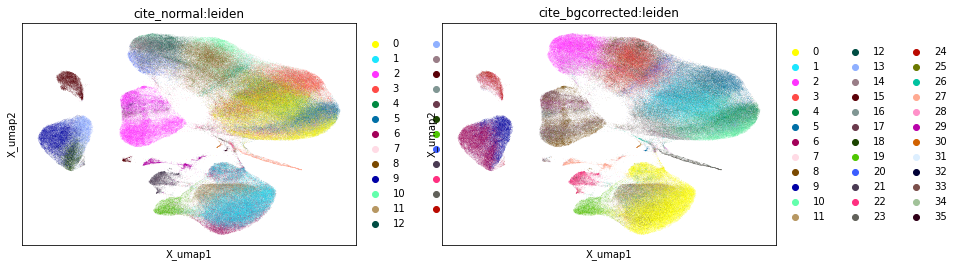

In [41]:
mu.pl.umap(mdata2, color=['cite_normal:leiden', 'cite_bgcorrected:leiden'])

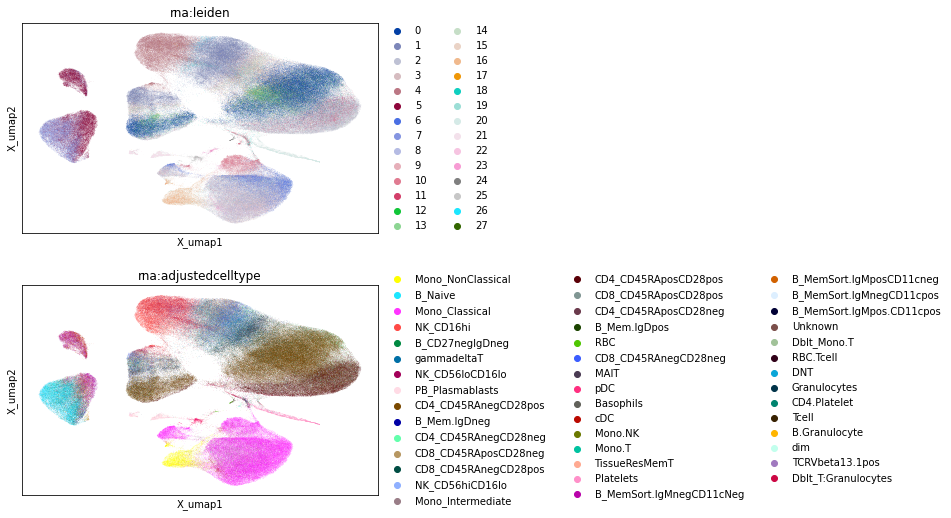

In [3]:
mu.pl.umap(mdata2, color=['rna:leiden', 'rna:adjustedcelltype'], ncols =1)